In [1]:
from sklearn import tree, datasets, model_selection
import pandas as pd
import graphviz
from matplotlib import pyplot as plt
import numpy as np

In [4]:
wine = datasets.load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [13]:
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0


In [33]:
Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(wine.data, 
                                                                wine.target, 
                                                                test_size=0.3,
                                                                random_state=66,
                                                               )
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9629629629629629

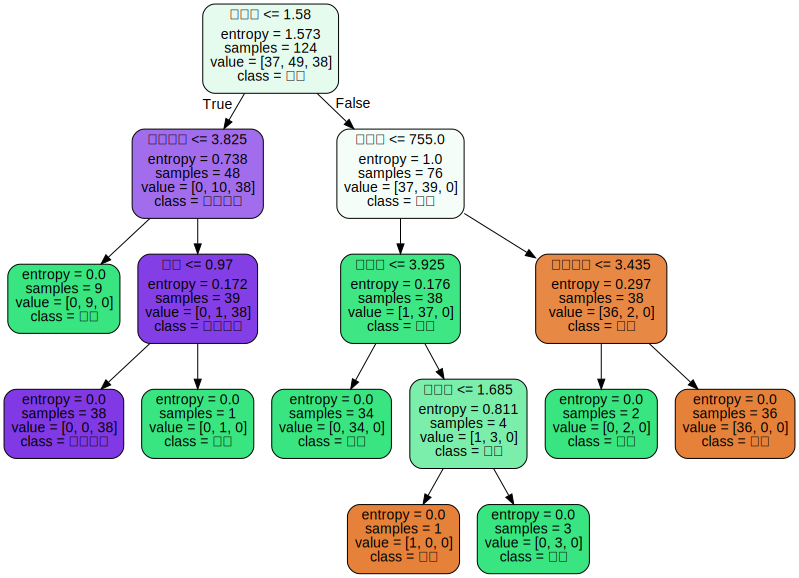

In [34]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=feature_name,
                                class_names =['琴酒', '雪莉', '贝尔摩德'],
                                rounded= True, # 圆角
                                filled=True, #填充颜色，不纯度越低，背景颜色越深
                               )
graph = graphviz.Source(dot_data)
graph

In [21]:
clf.feature_importances_

array([0.0175685 , 0.        , 0.        , 0.03440235, 0.        ,
       0.        , 0.42880307, 0.        , 0.        , 0.22190235,
       0.        , 0.        , 0.29732373])

In [22]:
# 将特征和特征的重要性 压缩处理 每个元素都是元祖
[*zip(wine.feature_names, clf.feature_importances_)]

[('alcohol', 0.017568497837376018),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.034402354761880256),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.4288030691154691),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.22190234561328231),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.2973237326719922)]

准确率为：0.888889


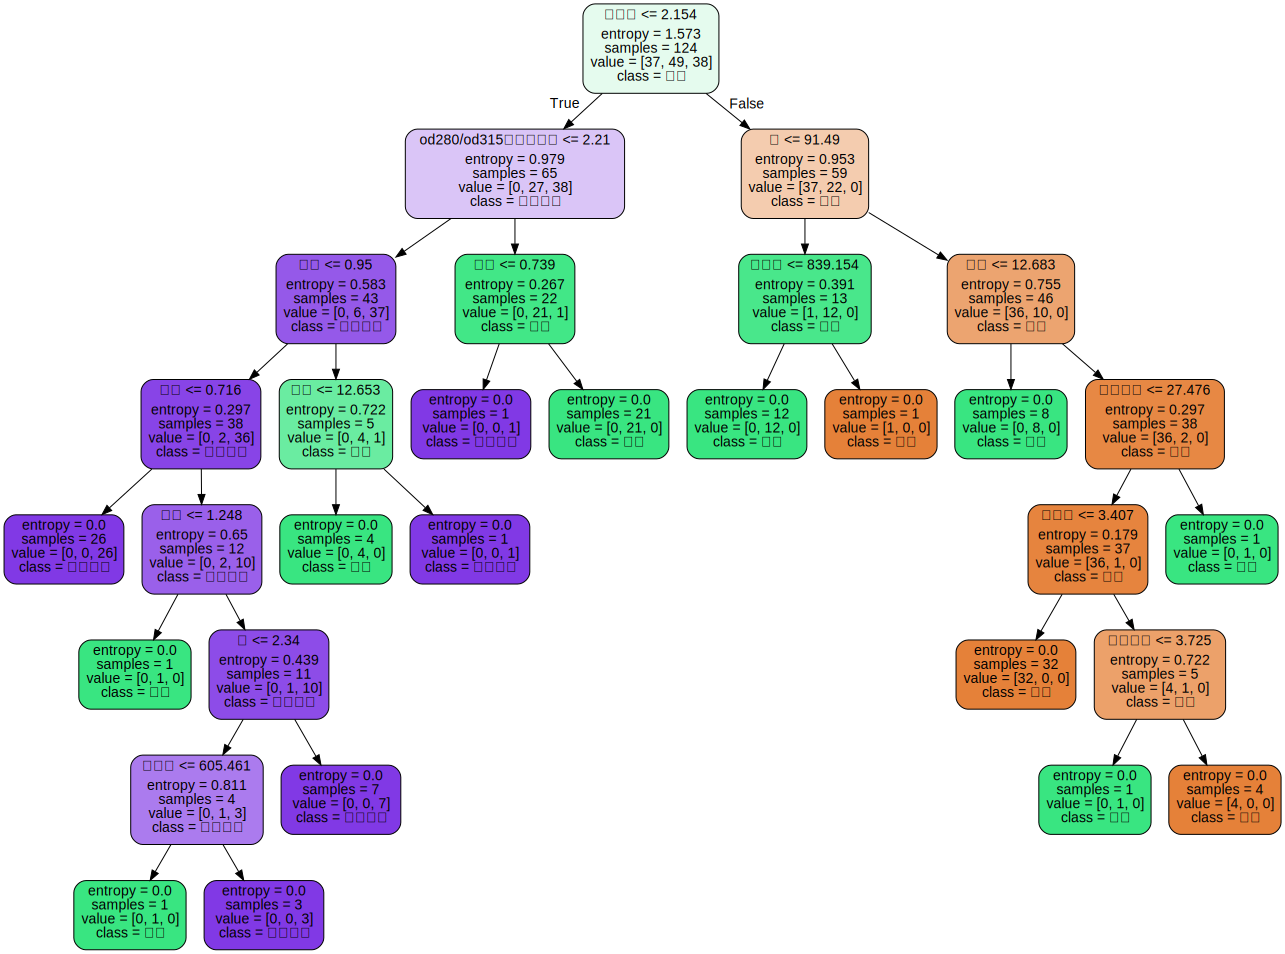

In [36]:
# 使用splitter: best or random
# 使用best 虽然决策树的分支是随机的，但是还是会优先选择重要的特征进行分支
# 而 randon 决策树的分支更加随机，树会因为含有不必要的信息更深更大，并因为这些不必要的信息降低对训练集的拟合
clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                  random_state=30,
                                  splitter='random'
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
print('准确率为：%f' % score)
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=feature_name,
                                class_names =['琴酒', '雪莉', '贝尔摩德'],
                                rounded= True, # 圆角
                                filled=True, #填充颜色，不纯度越低，背景颜色越深
                               )
graph = graphviz.Source(dot_data)
graph

树的深度为：4， 最大的准确率：0.962963


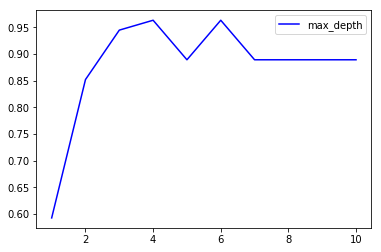

In [39]:
# 通过画学习曲线 确定最优的剪枝参数
test = []
for i in range(1, 11):
    clf = tree.DecisionTreeClassifier(max_depth=i, 
                                      criterion='entropy', 
                                      random_state=30, 
                                      splitter='random'
                                     ).fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
print('树的深度为：%d， 最大的准确率：%f' % (test.index(max(test)) + 1 , max(test)))
plt.plot(range(1, 11), test, c='b', label='max_depth')
plt.legend()
plt.show()

In [42]:
# 数据升维
np.array([1, 2, 3, 4]).reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4]])

In [44]:
# 回归树
boston = datasets.load_boston()
regressor = tree.DecisionTreeRegressor(random_state=0)
cross_val_score = model_selection.cross_val_score(regressor, 
                                                  boston.data, 
                                                  boston.target, 
                                                  cv=10,
                                                  scoring='neg_mean_squared_error' # 就是均方误差前面加一个负号
                                                 )
cross_val_score

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

In [55]:
# 创建一条有噪声的正弦曲线 让回归树进行训练测试
rng = np.random.RandomState(66)
# 随机生成一个80个0~5之间的数据 组成二维矩阵 然后排序
X = np.sort(5 * rng.rand(80, 1), axis=0)
# 使用正弦函数求值 并降维处理 因为plt绘画需要一维数组
y = np.sin(X).ravel()
# 添加噪声数据
y[::5] += 3 * (0.5 - rng.rand(16))

In [60]:
# 实例化模型 进行训练
regr_1 = tree.DecisionTreeRegressor(max_depth=3).fit(X, y)
regr_2 = tree.DecisionTreeRegressor(max_depth=5).fit(X, y)

In [67]:
# 导入测试集 预测结果
# 先生成一维数据，在升维 [:, np.newaxis]相当于reshape(-1, 1)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [68]:
l = np.array([1, 2, 3, 4])
l.shape

(4,)

In [69]:
l[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4]])

In [70]:
l[:, np.newaxis].shape

(4, 1)

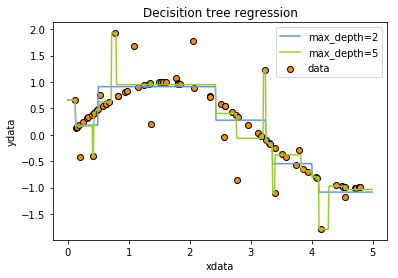

In [71]:
plt.figure()
plt.scatter(X, y, edgecolors='k', c='darkorange', label='data')
plt.plot(X_test, y_1, c='cornflowerblue', label='max_depth=2')
plt.plot(X_test, y_2, c='yellowgreen', label='max_depth=5')
plt.xlabel('xdata')
plt.ylabel('ydata')
plt.title('Decisition tree regression')
plt.legend()
plt.show()

In [2]:
# 使用决策树预测泰坦尼克号的幸存者
data = pd.read_csv('./data/data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# 对数据进行预处理
# 删除对预测结果没有关系的特征列 Cabin缺失值太多 接近80 故舍去
data.drop(['Name', 'Cabin', 'Ticket'], inplace=True, axis=1)

In [5]:
# 处理缺失值
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [6]:
data = data.dropna()

In [7]:
# 接下来处理连续性变量
data['Sex'] = (data['Sex'] == 'male').astype(int)

In [8]:
data['Sex'].value_counts()

1    577
0    312
Name: Sex, dtype: int64

In [9]:
# Embarked 登船门
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))

In [10]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [11]:
X = data.iloc[:, data.columns != 'Survived']
y = data.iloc[:, data.columns == 'Survived']

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=30)

In [13]:
# X_train.shape  # (622, 8)
# X_test.shape # (267, 8)
y_train.shape

(622, 1)

In [14]:
# 重新索引
for i in [X_train, X_test, y_train, y_test]:
    i.index = range(i.shape[0])
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,236,3,0,29.699118,0,0,7.5500,0
1,353,3,1,15.000000,1,1,7.2292,1
2,398,2,1,46.000000,0,0,26.0000,0
3,350,3,1,42.000000,0,0,8.6625,0
4,376,1,0,29.699118,1,0,82.1708,1


In [15]:
# 导入模型粗略跑一下 查看结果
clf = tree.DecisionTreeClassifier(random_state=66).fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('正确率：%f' % score)
mean_score_ = model_selection.cross_val_score(clf, X_test, y_test, cv=10).mean()
print('交叉验证正确率：%f' % mean_score_)


正确率：0.715356
交叉验证正确率：0.751333


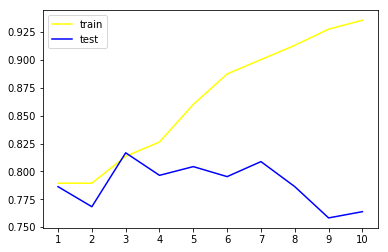

In [16]:
# 绘画学习曲线 观察不同的max_depth对结果的影响
train_score = []
test_score = []
for i in range(1, 11):
    clf = tree.DecisionTreeClassifier(max_depth=i,
                                      random_state=30,
                                      criterion='entropy'
                                     )
    clf = clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    mean_score = model_selection.cross_val_score(clf, X, y, cv=10).mean()
    train_score.append(score)
    test_score.append(mean_score)

plt.plot(range(1, 11), train_score, c='yellow', label='train')
plt.plot(range(1, 11), test_score, c='b', label='test')
plt.xticks(range(1, 11))
plt.legend()
plt.show()

In [17]:
train_score

[0.7893890675241158,
 0.7893890675241158,
 0.8135048231511254,
 0.8263665594855305,
 0.860128617363344,
 0.887459807073955,
 0.9003215434083601,
 0.9131832797427653,
 0.927652733118971,
 0.9356913183279743]

In [109]:
[*range(1, 11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
# 使用网格搜索调整参数
gini_thresholds = np.linspace(0, 0.5, 20)
params = {'criterion': ('gini', 'entropy'), 
          'max_depth': [*range(1, 11)],
          'splitter': ('best', 'random'),
          'min_samples_leaf': [*range(1, 50, 5)],
          'min_impurity_decrease': [*np.linspace(0, 0.5, 20)]
         }
clf = tree.DecisionTreeClassifier(random_state=30)
GS = model_selection.GridSearchCV(clf, param_grid=params, n_jobs=-1, cv=10)
GS.fit(X_train, y_train)
GS.best_params_

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy',
 'max_depth': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 26,
 'splitter': 'best'}

In [26]:
GS.best_score_

0.8215434083601286